In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten,Dense, Dropout
import matplotlib.pyplot as plt
import os
import time

from tensorflow.python.ops.gen_batch_ops import Batch

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

NameError: ignored

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [ ]:
train_images.shape

(49500, 32, 32, 3)

In [ ]:
model = keras.models.Sequential([            
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(4 ,4 )),
    keras.layers.Conv2D(  , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(  ),
    keras.layers.Conv2D(  , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(  , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(  , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D( ),
    keras.layers.Flatten(),
    keras.layers.Dense(  ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(  ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(  , activation='softmax')
])

SyntaxError: ignored

https://stackoverrun.com/ko/q/11696058

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 384)        

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [ ]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 55s 25ms/step - loss: 1.8150 - accuracy: 0.3794 - val_loss: 1.5026 - val_accuracy: 0.4620
Epoch 2/10
1547/1547 [==============================] - 39s 25ms/step - loss: 1.5530 - accuracy: 0.4462 - val_loss: 2.0813 - val_accuracy: 0.3720
Epoch 3/10
1547/1547 [==============================] - 38s 25ms/step - loss: 1.4864 - accuracy: 0.4727 - val_loss: 1.4865 - val_accuracy: 0.4900
Epoch 4/10
1547/1547 [==============================] - 38s 24ms/step - loss: 1.4545 - accuracy: 0.4828 - val_loss: 1.7478 - val_accuracy: 0.4560
Epoch 5/10
1547/1547 [==============================] - 38s 24ms/step - loss: 1.4088 - accuracy: 0.5031 - val_loss: 1.4221 - val_accuracy: 0.4920
Epoch 6/10
1547/1547 [==============================] - 38s 25ms/step - loss: 1.3801 - accuracy: 0.5139 - val_loss: 1.3789 - val_accuracy: 0.5180
Epoch 7/10
1547/1547 [==============================] - 38s 25ms/step - loss: 1.3571 - accuracy: 0.5205 - val_loss: 1.3080 -

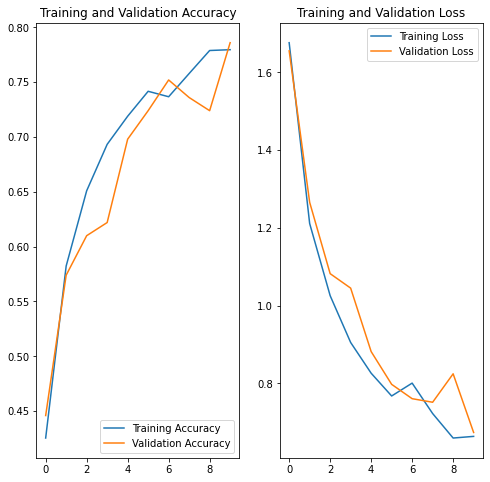

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()